In [1]:
from k_means_const_manhatten import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Creating the delivery Locations

In [2]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

## Visualizing the data

In [3]:
def initial_plot(delivery_loc):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    plt.title("Delivery Locations")
    plt.show()

In [4]:
def clusters_plot(clusters, centroids):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("After Clustering")
    plt.show()

In [5]:
def dp_plot(clusters, centroids, dp):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.scatter(dp[0], dp[1], marker='+',s=200, c="red")
    plt.title("After DP Creation")
    plt.show()

In [6]:
def final_plot(clusters, dp):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']

    for i in clusters:
        pts = np.array(clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        for j in range(len(pts)-1):
            pt_1 = pts[j]
            pt_2 = pts[j+1]

            # x axis
            f_pt = np.array([pt_1[0], pt_1[0]])
            s_pt = np.array([pt_1[1], pt_2[1]])

            # y axis
            t_pt = np.array([pt_1[0], pt_2[0]])
            l_pt = np.array([pt_2[1], pt_2[1]])

            plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
            plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

    plt.scatter(dp[0], dp[1], c="red", marker='X',s=200)
    plt.title("Final Result")
    plt.show()

## KMeans Clustering

In [7]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [8]:
from k_means_constrained import KMeansConstrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

## Calculate DP

In [9]:
def calculate_dp(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return [loc_x, loc_y]

## Traveling Salesman Problem

In [10]:
def calculate_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [11]:
def tsp(cluster, opt_dp):
    cluster.insert(0, opt_dp)
    unvisited = cluster.copy()
    tour = [opt_dp]
    unvisited.remove(opt_dp)

    while unvisited:
        nearest_point = min(unvisited, key=lambda x: calculate_distance(tour[-1], x))
        tour.append(nearest_point)
        unvisited.remove(nearest_point)

    # Return to the starting point to complete the cycle
    tour.append(opt_dp)
    
    return tour

In [12]:
from itertools import permutations

def tsp_brut(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].append(dp)
        path[i].insert(0, dp)

        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(path[i])-1):
            sum += calculate_distance(path[i][j], path[i][j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

## Main

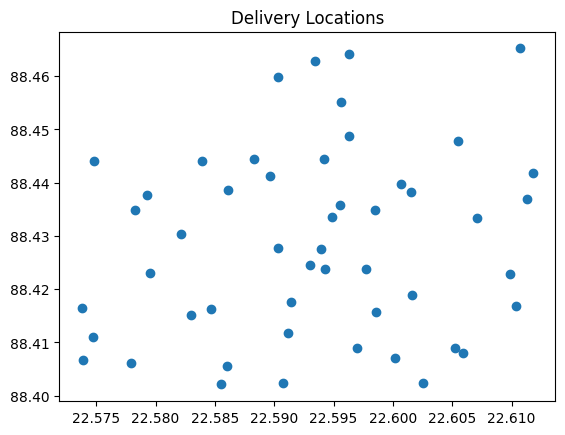

In [13]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc)

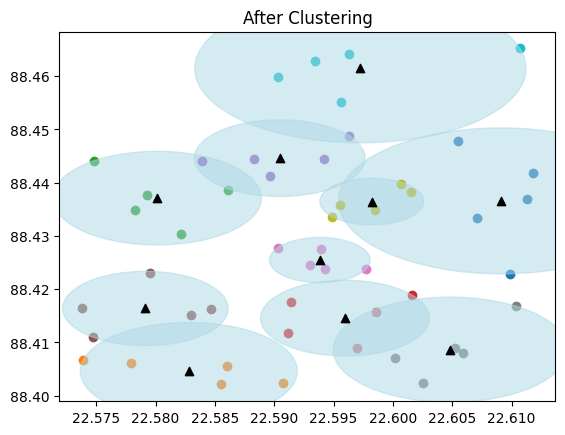

In [14]:
# Cluster the data and get the labels and centroids
centroids, clusters = KMeans(delivery_loc, n, k)

# Visualize the data
clusters_plot(clusters, centroids)

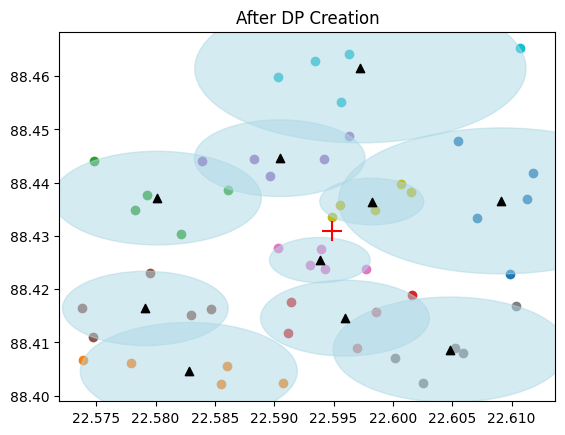

In [15]:
# Calculate DP
DP = calculate_dp(centroids)

# Visualize the data
dp_plot(clusters, centroids, DP)

In [16]:
# Shortest path calculation in each cluster
for i in clusters:
    clusters[i] = tsp(clusters[i], DP)


In [17]:
for i in clusters:
    print("Path",i,":")
    for j in clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.594900000000003, 88.43096] -> [22.6071, 88.4334] -> [22.6113, 88.4369] -> [22.6118, 88.4418] -> [22.6055, 88.4479] -> [22.6099, 88.4229] -> [22.594900000000003, 88.43096] -> End
Path 1 :
[22.594900000000003, 88.43096] -> [22.5907, 88.4024] -> [22.5855, 88.4021] -> [22.586, 88.4056] -> [22.5779, 88.4062] -> [22.5739, 88.4067] -> [22.594900000000003, 88.43096] -> End
Path 2 :
[22.594900000000003, 88.43096] -> [22.5821, 88.4303] -> [22.5783, 88.4348] -> [22.5793, 88.4376] -> [22.5861, 88.4387] -> [22.5748, 88.4441] -> [22.594900000000003, 88.43096] -> End
Path 3 :
[22.594900000000003, 88.43096] -> [22.5914, 88.4175] -> [22.5912, 88.4117] -> [22.597, 88.409] -> [22.5986, 88.4157] -> [22.6016, 88.4189] -> [22.594900000000003, 88.43096] -> End
Path 4 :
[22.594900000000003, 88.43096] -> [22.5942, 88.4444] -> [22.5883, 88.4445] -> [22.5896, 88.4413] -> [22.5839, 88.444] -> [22.5963, 88.4488] -> [22.594900000000003, 88.43096] -> End
Path 5 :
[22.594900000000003, 88.43096] -> [22.57

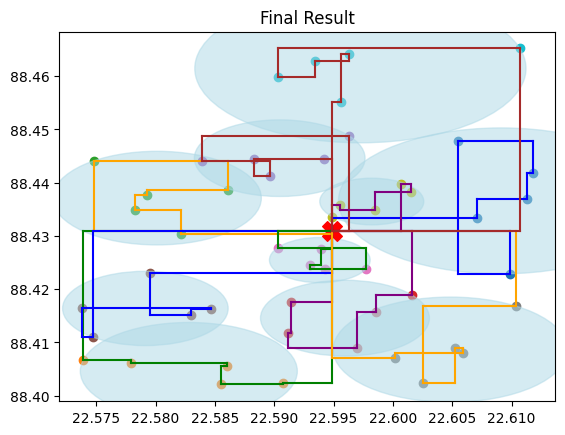

In [18]:
# Final Visualization
final_plot(clusters, DP)

## Calculate Total DIstance

In [19]:
def total_distance(clusters):
    total = 0
    for i in clusters:
        pts = clusters[i]
        for j in range(len(pts)-1):
            total += calculate_distance(pts[j], pts[j+1])
    
    return total

*Total distance in manhattan cluster*

In [20]:
dist_1 = total_distance(clusters)
print("Distance using manhattan cluster :",dist_1)

Distance using manhattan cluster : 0.7910400000000521


*Total distance in euclidian cluster*

Path 0 :
[22.59497, 88.42775] -> [22.5903, 88.4278] -> [22.5943, 88.4237] -> [22.5795, 88.4231] -> [22.5821, 88.4303] -> [22.5847, 88.4162] -> [22.59497, 88.42775] -> End
Path 1 :
[22.59497, 88.42775] -> [22.5942, 88.4444] -> [22.5883, 88.4445] -> [22.5896, 88.4413] -> [22.5963, 88.4488] -> [22.6055, 88.4479] -> [22.59497, 88.42775] -> End
Path 2 :
[22.59497, 88.42775] -> [22.5977, 88.4237] -> [22.6016, 88.4189] -> [22.5986, 88.4157] -> [22.6104, 88.4168] -> [22.6099, 88.4229] -> [22.59497, 88.42775] -> End
Path 3 :
[22.59497, 88.42775] -> [22.6015, 88.4383] -> [22.6007, 88.4397] -> [22.6071, 88.4334] -> [22.6113, 88.4369] -> [22.6118, 88.4418] -> [22.59497, 88.42775] -> End
Path 4 :
[22.59497, 88.42775] -> [22.5956, 88.4551] -> [22.5963, 88.4642] -> [22.5934, 88.4628] -> [22.5903, 88.4599] -> [22.6107, 88.4652] -> [22.59497, 88.42775] -> End
Path 5 :
[22.59497, 88.42775] -> [22.5914, 88.4175] -> [22.5912, 88.4117] -> [22.5907, 88.4024] -> [22.5855, 88.4021] -> [22.586, 88.4056] -> [22

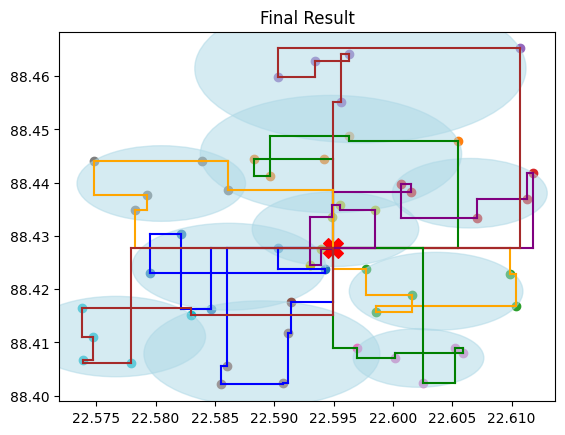

In [21]:
# Cluster the data and get the labels and centroids
centroids_2, clusters_2 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_2 = calculate_dp(centroids_2)

# Shortest path calculation in each cluster
for i in clusters_2:
    clusters_2[i] = tsp(clusters_2[i], DP_2)

for i in clusters_2:
    print("Path",i,":")
    for j in clusters_2[i]:
        print(j,"->",end=" ")
    print("End")

dist_2 = total_distance(clusters_2)
print("\nDistance using euclidian cluster :",dist_2)

final_plot(clusters_2, DP_2)

*Approach 3 : Manhattan cluster with bruteforce TSP*

Path 0 :
[22.594900000000003, 88.43096] -> [22.5955, 88.4358] -> [22.6007, 88.4397] -> [22.6015, 88.4383] -> [22.5985, 88.4349] -> [22.5949, 88.4336] -> [22.594900000000003, 88.43096] -> End
Path 1 :
[22.594900000000003, 88.43096] -> [22.6016, 88.4189] -> [22.5986, 88.4157] -> [22.597, 88.409] -> [22.5912, 88.4117] -> [22.5914, 88.4175] -> [22.594900000000003, 88.43096] -> End
Path 2 :
[22.594900000000003, 88.43096] -> [22.5896, 88.4413] -> [22.5839, 88.444] -> [22.5883, 88.4445] -> [22.5942, 88.4444] -> [22.5963, 88.4488] -> [22.594900000000003, 88.43096] -> End
Path 3 :
[22.594900000000003, 88.43096] -> [22.5903, 88.4599] -> [22.5934, 88.4628] -> [22.5963, 88.4642] -> [22.6107, 88.4652] -> [22.5956, 88.4551] -> [22.594900000000003, 88.43096] -> End
Path 4 :
[22.594900000000003, 88.43096] -> [22.5977, 88.4237] -> [22.5943, 88.4237] -> [22.593, 88.4246] -> [22.5903, 88.4278] -> [22.5939, 88.4275] -> [22.594900000000003, 88.43096] -> End
Path 5 :
[22.594900000000003, 88.43096] -> [22.57

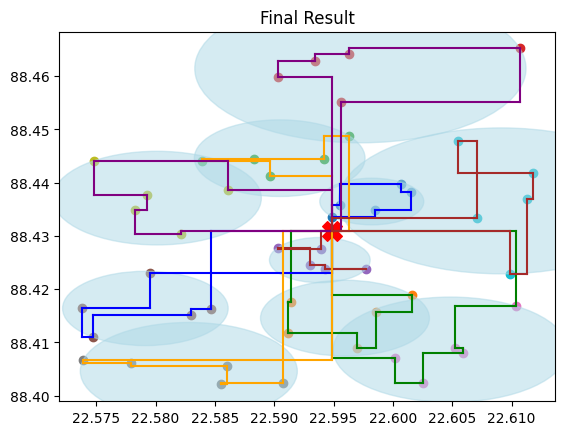

In [22]:
# Cluster the data and get the labels and centroids
centroids_3, clusters_3 = KMeans(delivery_loc, n, k)

# Calculate DP
DP_3 = calculate_dp(centroids_3)

# Shortest path calculation in each cluster
for i in clusters_3:
    clusters_3[i] = tsp_brut(clusters_3[i], DP_3)

for i in clusters_3:
    print("Path",i,":")
    for j in clusters_3[i]:
        print(j,"->",end=" ")
    print("End")

dist_3 = total_distance(clusters_3)
print("\nDistance using manhattan cluster and bruteforce TSP :",dist_3)

final_plot(clusters_3, DP_3)

*Approach 4 : Euclidean cluster with bruteforce TSP*

Path 0 :
[22.594920000000002, 88.4291] -> [22.5977, 88.4237] -> [22.6099, 88.4229] -> [22.6104, 88.4168] -> [22.6016, 88.4189] -> [22.5986, 88.4157] -> [22.594920000000002, 88.4291] -> End
Path 1 :
[22.594920000000002, 88.4291] -> [22.5795, 88.4231] -> [22.5783, 88.4348] -> [22.5748, 88.4441] -> [22.5793, 88.4376] -> [22.5821, 88.4303] -> [22.594920000000002, 88.4291] -> End
Path 2 :
[22.594920000000002, 88.4291] -> [22.6071, 88.4334] -> [22.6015, 88.4383] -> [22.5985, 88.4349] -> [22.5955, 88.4358] -> [22.5949, 88.4336] -> [22.594920000000002, 88.4291] -> End
Path 3 :
[22.594920000000002, 88.4291] -> [22.583, 88.4152] -> [22.5779, 88.4062] -> [22.5739, 88.4067] -> [22.5747, 88.411] -> [22.5738, 88.4164] -> [22.594920000000002, 88.4291] -> End
Path 4 :
[22.594920000000002, 88.4291] -> [22.5942, 88.4444] -> [22.5883, 88.4445] -> [22.5839, 88.444] -> [22.5861, 88.4387] -> [22.5896, 88.4413] -> [22.594920000000002, 88.4291] -> End
Path 5 :
[22.594920000000002, 88.4291] -> [22.5912, 88.411

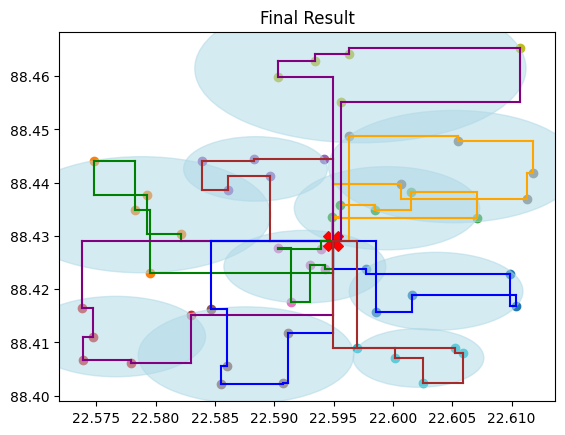

In [23]:
# Cluster the data and get the labels and centroids
centroids_4, clusters_4 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_4 = calculate_dp(centroids_4)

# Shortest path calculation in each cluster
for i in clusters_4:
    clusters_4[i] = tsp_brut(clusters_4[i], DP_4)

for i in clusters_4:
    print("Path",i,":")
    for j in clusters_4[i]:
        print(j,"->",end=" ")
    print("End")

dist_4 = total_distance(clusters_4)
print("\nDistance using euclidean cluster and bruteforce TSP :",dist_4)

final_plot(clusters_4, DP_4)

In [24]:
#Results

print("Distance using manhattan cluster and non-bruteforce TSP :",dist_1)
print("Distance using euclidean cluster and non-bruteforce TSP :",dist_2)
print("Distance using manhattan cluster and bruteforce TSP :",dist_3)
print("Distance using euclidean cluster and bruteforce TSP :",dist_4)

Distance using manhattan cluster and non-bruteforce TSP : 0.7910400000000521
Distance using euclidean cluster and non-bruteforce TSP : 0.7680000000000433
Distance using manhattan cluster and bruteforce TSP : 0.7246400000000506
Distance using euclidean cluster and bruteforce TSP : 0.7140800000000596
